In [1]:
import numpy as np
import pandas as pd

from sklearn import datasets
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from functools import partialmethod
pd.DataFrame.head = partialmethod(pd.DataFrame.head, n=5)

pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 50)

## Define the problem

**Given**: 

Data from the Irish National Household Survey for the year 2015. 

The data contains information on the respondents' labour status (are they unemployed/working/studying etc), and a range of variables about their educational and demographic background (such as education level, education field, age, marital status, region of residency etc). 

**Goal**: Categorise respondents into unemployed/employed based on information about their educational/demographic background. 

    

#### Description about variables:
employed: 1=employed, 2=unemployed. 

sex: 1=male, 2=female 

marriage status: 1=single, 2=married, 3=widowed, 4=divorced

nationality: 1= ireland, 2=uk, 3=eu15, 4=rest of eu, 5=usa/canada, 5=rest of world

    nationality_1: almost the same
    
    nationality_3: almost the same 
    
**education level**: 
- 000=no formal education, 
- 100=ISCED1, 
- 200=ISCED2, 
- 300=ISCED3, 303=ISCED 3, 304=ISCED3, 
- 400=ISCED4, 
- 500=ISCED5, 
- 600=ISCED6, 
- 700=SCIED7, 
- 800=ISCED8, 
- 999=Not applicable. (where ISCED1-3~Primary school, ISCED4-5~Secondary School and ISCED6-8~Tertiary level)

**education field**: 
- 000= General programmes Data available from Q1 2004 to Q4 2013
- 100= Teacher training and education science
- 200= Humanities, languages and arts
- 222= Foreign languages
- 300= Social sciences, business and law
- 400= Science, mathematics and computing (no distinction possible)
- 420= Life science (including Biology and Environmental science)
- 440= Physical science (including Physics, Chemistry and Earth
- science)
- 460= Mathematics and statistics
- 481= Computer science
- 482= Computer use
- 500= Engineering, manufacturing and construction
- 600= Agriculture and veterinary
- 700= Health and welfare
- 800= Services
- 900= Unknown
- 999= Not applicable (HATLEVEL= 00,11,21,99, Blank)
Blank No answer


**age_group**:
- 01= Aged 0 to 4 years
- 02= Aged 5 to 9 years
- 03= Aged 10 to 14 years
- 04= Aged 15 to 19 years
- 05= Aged 20 to 24 years
- 06= Aged 25 to 29 years
- 07= Aged 30 to 34 years
- 08= Aged 35 to 39 years
- 09= Aged 40 to 44 years
- 10= Aged 45 to 49 years
- 11= Aged 50 to 54 years
- 12= Aged 55 to 59 years
- 13= Aged 60 to 64 years
- 14= Aged 65 to 69 years
- 15= Aged 70 to 74 years
- 16= Aged 75 to 79 years
- 17= Aged 80 to 84 years
- 18= Aged 85 or more

household_type:
1= Couple family unit – no children
2= Couple family unit – with children
3= Lone parent family unit
9= Not applicable (FAMILYUNITGROUPNUMBER=0)

region: 
01= Border, Midland and Western 
    011=Border 
    012=Midland 
    013=Western
02= Southern and Eastern 
    021=Dublin 
    022=Mid-East 
    023=Mid-West 
    024=South-East 
    025South-West



## Prepare the data (Data Preprocessing)

### Load the data

In [2]:
path_to_file = "QNHS_2015.csv"
df=pd.read_csv(path_to_file)

In [3]:
df.head()

,mainstat,sex,marstat,national_summary_x1,national_summary_x3,national_summary,hatlevel,hatfield,ageclass,familytype_summary,region
0,7.0,2,2,NaN,1.0,1.0,600.0,NaN,8,2,1
1,1.0,1,2,NaN,1.0,1.0,600.0,NaN,11,2,1
2,9.0,2,1,NaN,1.0,1.0,999.0,9999.0,3,2,1
3,9.0,2,1,NaN,1.0,1.0,999.0,9999.0,2,2,1
4,9.0,2,1,NaN,1.0,1.0,999.0,9999.0,2,2,1


In [4]:
#rename variables
df.rename(columns={"mainstat":"employed", 
                   "marstat":"marriage_status",
                   "national_summary_x1":"nationality_1",
                   "national_summary_x3": "nationality_3",
                   "national_summary":"nationality", 
                   "hatlevel":"education_level", 
                   "hatfield":"education_field", 
                   "ageclass":"age_group", 
                   "familytypesummary":"household_type"}, inplace=True)



In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95986 entries, 0 to 95985
Data columns (total 11 columns):
employed              95941 non-null float64
sex                   95986 non-null int64
marriage_status       95986 non-null int64
nationality_1         0 non-null float64
nationality_3         95981 non-null float64
nationality           95985 non-null float64
education_level       93995 non-null float64
education_field       93816 non-null float64
age_group             95986 non-null int64
familytype_summary    95986 non-null int64
region                95986 non-null int64
dtypes: float64(6), int64(5)
memory usage: 8.1 MB


In [6]:
df.describe()


,employed,sex,marriage_status,nationality_1,nationality_3,nationality,education_level,education_field,age_group,familytype_summary,region
count,95941.000000,95986.000000,95986.000000,0.0,95981.000000,95985.000000,93995.000000,93816.000000,95986.000000,95986.000000,95986.000000
mean,4.080841,1.508376,1.595389,NaN,1.263010,1.262145,503.118634,5177.151424,8.023045,2.949003,1.742264
std,3.246658,0.499932,0.737799,NaN,0.932704,0.928920,316.592697,4864.442425,4.605403,2.517858,0.437390
min,1.000000,1.000000,1.000000,NaN,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,NaN,1.000000,1.000000,200.000000,300.000000,4.000000,2.000000,1.000000
50%,3.000000,2.000000,1.000000,NaN,1.000000,1.000000,400.000000,9999.000000,8.000000,2.000000,2.000000
75%,7.000000,2.000000,2.000000,NaN,1.000000,1.000000,700.000000,9999.000000,12.000000,3.000000,2.000000
max,9.000000,2.000000,4.000000,NaN,6.000000,6.000000,999.000000,9999.000000,18.000000,9.000000,2.000000


In [22]:
# get unique values on;y
s_values = df.employed.unique()
print(f'unique values: {s_values}')

### get unique values and counts with numpy methods:
# better to print after cleaning, or to skip NaNs:
values, counts = np.unique(df.employed[~np.isnan(df.employed)], return_counts=True)
print(f'unique values: {values}')
print(f'unique counts: {counts}')


unique values: [1. 2.]
unique values: [1. 2.]
unique counts: [38630  4695]


### Clean

In [23]:
# Target Variable: 
# Exclude values from 'employed' which indicate a status other than employed or unemployed (e.g. student or XXX)

mask=np.array((df.employed==2) | (df.employed==1))
df=df[mask]

# iep: why?
df.reset_index(inplace=True)
df.drop("index", axis=1, inplace=True)

In [25]:
#Show unique values for each column and rate of occurance. 
df_1=df.apply(pd.Series.value_counts)

# iep: note the result shape: 
print(f'df.shape: {df.shape}')
print(f'df_1.shape: {df_1.shape}')

df_1

df.shape: (43325, 11)
df_1.shape: (37, 11)


,employed,sex,marriage_status,nationality_1,nationality_3,nationality,education_level,education_field,age_group,familytype_summary,region
0.0,NaN,NaN,NaN,NaN,NaN,NaN,66.0,10607.0,NaN,NaN,NaN
1.0,38630.0,23889.0,16154.0,NaN,38201.0,38201.0,NaN,NaN,NaN,7953.0,10696.0
2.0,4695.0,19436.0,24500.0,NaN,773.0,773.0,NaN,NaN,NaN,24467.0,32629.0
3.0,NaN,NaN,633.0,NaN,700.0,700.0,NaN,NaN,NaN,4314.0,NaN
4.0,NaN,NaN,2038.0,NaN,2567.0,2615.0,NaN,NaN,526.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
600.0,NaN,NaN,NaN,NaN,NaN,NaN,9437.0,896.0,NaN,NaN,NaN
700.0,NaN,NaN,NaN,NaN,NaN,NaN,3421.0,3291.0,NaN,NaN,NaN
800.0,NaN,NaN,NaN,NaN,NaN,NaN,408.0,1926.0,NaN,NaN,NaN
900.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,305.0,NaN,NaN,NaN


In [32]:
def show_nan():
    keys=list(df.columns)
    
    values=[]
    #print('keys: {}'.format(keys))

    #fill the values list with number of NaN cells in each column 
    for column in df: 
        values.append(str(df[column].isna().sum()))

    #amend values list to show 'ALL' if all values in a column are NaN
    for i in range(len(values)):
        if values[i]==str(len(df)):
            values[i]="ALL"
    #print('values: {}'.format(values))

    #create dataframe from a dictionary from the two lists
    test=pd.DataFrame.from_dict(dict(zip(keys, values)), orient='index')
    test.columns=["number of NaN values"]
    pd.set_option('display.max_rows', None)    
    return test
    # iep: NOTHING is executed AFTER return
    pd.set_option('display.max_rows', 10)
    
show_nan()    

,number of NaN values
employed,0
sex,0
marriage_status,0
nationality_1,ALL
nationality_3,3
nationality,0
education_level,1336
education_field,1674
age_group,0
familytype_summary,0


In [35]:
# show_nan([df.columns])
# DONE?: refactor function and send to MArtina
def show_nan_per_coulumn():
    # get all NaN counts per each column:
    nan = df.isnull().sum()

    # make new df with NaN values counts
    df_count_nan = pd.DataFrame(nan, columns=['number of NaN values'])
    df_count_nan

    # replace with 'All' for columns with NaN values only
    df_count_nan.replace(df.shape[0], 'ALL')
    
    return df_count_nan
    
show_nan_per_coulumn()

,number of NaN values
employed,0
sex,0
marriage_status,0
nationality_1,43325
nationality_3,3
nationality,0
education_level,1336
education_field,1674
age_group,0
familytype_summary,0


In [26]:
df.isnull().sum()

employed                  0
sex                       0
marriage_status           0
nationality_1         43325
nationality_3             3
nationality               0
education_level        1336
education_field        1674
age_group                 0
familytype_summary        0
region                    0
dtype: int64

In [ ]:
#drop columns 
df.drop(columns=["nationality_1"], axis=1, inplace=True)
df.drop(columns=["nationality_3"], axis=1, inplace=True)


In [25]:
# fill empty cells with mode values 
for c in df.columns:
    df[c].fillna(int(df[c].mode()), inplace=True)
show_nan()


,number of NaN values
employed,0
sex,0
marriage_status,0
nationality,0
education_level,0
education_field,0
age_group,0
familytype_summary,0
region,0


In [26]:
df.head()

,employed,sex,marriage_status,nationality,education_level,education_field,age_group,familytype_summary,region
0,1.0,1,2,1.0,600.0,0.0,11,2,1
1,1.0,1,1,1.0,100.0,9999.0,13,9,1
2,1.0,1,1,1.0,100.0,9999.0,14,9,1
3,1.0,1,2,1.0,304.0,0.0,13,1,2
4,1.0,2,1,1.0,304.0,0.0,7,3,2


#### Visualize with Seaborn

In [31]:
print(f'df.shape: {df.shape}')
print(f'df_1.shape: {df_1.shape}')


df.shape: (43325, 9)
df_1.shape: (37, 9)


array([ True,  True,  True,  True,  True,  True,  True,  True,  True])

In [35]:
#Express df_1 values (which show the counts of unique variables in each column) as percentages 

df_2=df_1.copy()

for c in df_1.columns:
    for r in df_1.index:
        if pd.notna(df_1.loc[r, c]):
            df_2.loc[r , c]=(df_1.loc[r, c])/(df_1[c].sum())
df_2.head()

,employed,sex,marriage_status,nationality,education_level,education_field,age_group,familytype_summary,region
0.0,NaN,NaN,NaN,NaN,0.001523,0.283462,NaN,NaN,NaN
1.0,0.891633,0.551391,0.372856,0.881731,NaN,NaN,NaN,0.183566,0.246878
2.0,0.108367,0.448609,0.565493,0.017842,NaN,NaN,NaN,0.564732,0.753122
3.0,NaN,NaN,0.014611,0.016157,NaN,NaN,NaN,0.099573,NaN
4.0,NaN,NaN,0.047040,0.060358,NaN,NaN,0.012141,NaN,NaN


In [38]:
df.columns.values[1:]

array(['sex', 'marriage_status', 'nationality', 'education_level',
       'education_field', 'age_group', 'familytype_summary', 'region'],
      dtype=object)

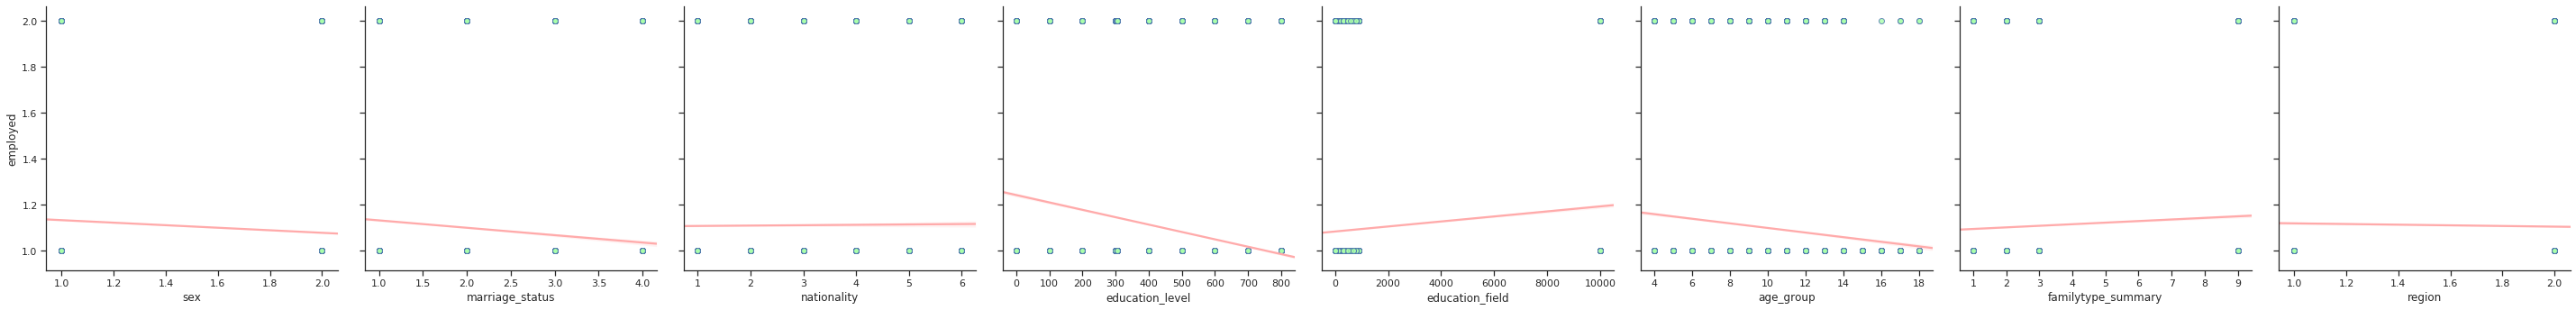

In [47]:
# TODO: refactore
sns.set(style="ticks", color_codes=True)
sns.pairplot(df, 
#              x_vars= ["sex", "marriage_status", "nationality", "education_level", "education_field", "age_group","familytype_summary", "region"],                      
             x_vars=df.columns.values[1:],
             y_vars="employed",
             
             palette=sns.hls_palette(6, l=.6, s=.8),             
             markers=["o"],
             
             plot_kws={'line_kws':{'color':'#FFAAAA'},
                       'scatter_kws':{'facecolors':'#AAFFAA'}},
             size=5, aspect=1,kind='reg')

In [41]:
df.corr()

,employed,sex,marriage_status,nationality,education_level,education_field,age_group,familytype_summary,region
employed,1.000000,-0.087970,-0.073577,0.005506,-0.181680,0.137427,-0.081163,0.057528,-0.019788
sex,-0.087970,1.000000,0.030364,-0.006318,0.170839,-0.146618,-0.067596,0.012302,0.017471
marriage_status,-0.073577,0.030364,1.000000,-0.029221,-0.046036,0.064398,0.463840,-0.109324,-0.038273
nationality,0.005506,-0.006318,-0.029221,1.000000,0.046157,-0.015314,-0.161597,0.096393,0.048044
education_level,-0.181680,0.170839,-0.046036,0.046157,1.000000,-0.645241,-0.207789,-0.007635,0.089086
education_field,0.137427,-0.146618,0.064398,-0.015314,-0.645241,1.000000,0.234782,0.059520,-0.063361
age_group,-0.081163,-0.067596,0.463840,-0.161597,-0.207789,0.234782,1.000000,-0.023220,-0.070134
familytype_summary,0.057528,0.012302,-0.109324,0.096393,-0.007635,0.059520,-0.023220,1.000000,0.041681
region,-0.019788,0.017471,-0.038273,0.048044,0.089086,-0.063361,-0.070134,0.041681,1.000000


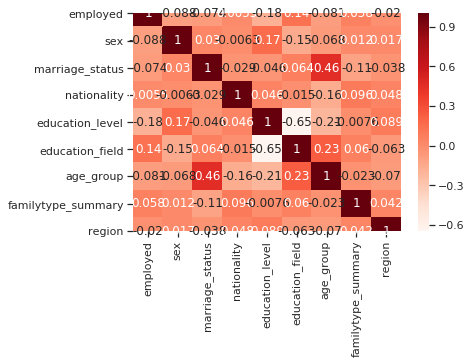

In [48]:
sns.heatmap(df.corr(), annot=True, cmap="Reds")

## Select features

Start with 3 explanatory variables for now. 

In [50]:
X = df[['sex', 'education_level', 'region']]
y = df['employed']
print(y.shape)

(43325,)


## Separate the training data from the test data

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
# print(f'X_train: {X_train[:5]}\n', f'y_train: {y_train[:5]}\n')
# print(f'X_test: {X_test[:5]}\n', f'y_test: {y_test[:5]}\n')

y_train.shape: (32493,)
y_test.shape: (10832,)


## Choose the model

Decision Tree Classification Model. 

In [60]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
model = DecisionTreeClassifier(max_depth=3, criterion='entropy')


## Train the model (fit the model)

In [61]:
fitted = model.fit(X_train,y_train)

## Predict (classify unknown input sample)

In [62]:
y_pred = fitted.predict(X_test)

In [64]:
y_pred.size, y_train.size

(10832, 32493)

In [66]:
print(f'y_train.shape: {y_train.shape}')
print(f'y_test.shape: {y_test.shape}')

y_train.shape: (32493,)
y_test.shape: (10832,)


## Evaluate the model

In [67]:
from sklearn import metrics

In [68]:
# get metrics:
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(`y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
r2 = metrics.r2_score(y_test, y_pred)

# print it
print('{:10s}: {}'.format('MAE: ', mae ) )
print('{:10s}: {}'.format('MSE: ', mse ) )
print('{:10s}: {}'.format('RMSE: ', rmse) )
print('{:10s}: {}'.format('r2_score', r2) )

MAE:      : 0.11216765140324964
MSE:      : 0.11216765140324964
RMSE:     : 0.3349143941416219
r2_score  : -0.12633877508578562
